In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)


In [104]:
rectangles=np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])




In [105]:
target_var = []

In [106]:
for k in range(7):
    target_var.append(0)
for i in range(11):
    target_var.append(1)
for j in range(44):
    target_var.append(2)

In [107]:
target_var = np.array(target_var)
type(target_var)

numpy.ndarray

In [108]:
rectangles

array([[1.  , 1.5 , 1.7 , 1.45, 1.1 , 1.6 , 1.8 ],
       [1.8 , 1.55, 1.45, 1.6 , 1.65, 1.7 , 1.75]])

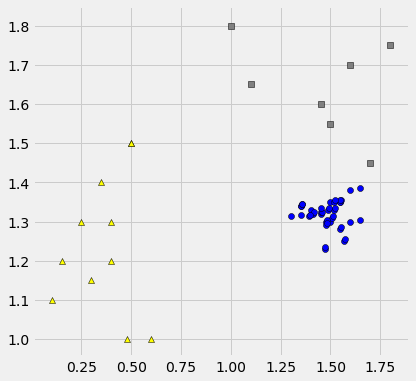

In [109]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax0.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')


# mean vectors per class

In [110]:
mean1= np.mean(rectangles,axis=1).reshape(2,1)
mean1

array([[1.45      ],
       [1.64285714]])

In [111]:
mean2=np.mean(triangles,axis=1).reshape(2,1)
mean2

array([[0.36636364],
       [1.24090909]])

In [112]:
mean3=np.mean(circles,axis=1).reshape(2,1)
mean3

array([[1.48193182],
       [1.31922727]])

# class Scatter-matrix(Sw) Sw=S1+S2+S3

In [113]:
S1=np.dot((rectangles-mean1),(rectangles-mean1).T)  #S1 is the covariance matrix for the class C1 
S1

array([[ 0.535     , -0.08      ],
       [-0.08      ,  0.08714286]])

In [114]:
S2=np.dot((triangles-mean2),(triangles-mean2).T) #S1 is the covariance matrix for the class C2
S2

array([[0.24145455, 0.02913636],
       [0.02913636, 0.31409091]])

In [115]:
S3=np.dot((circles-mean3),(circles-mean3).T)
S3

array([[ 0.3000108 , -0.00121682],
       [-0.00121682,  0.04883923]])

In [116]:
Sw=S1+S2+S3
print(Sw)

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


# Scatter between(Sb)


In [117]:
Sb=np.dot((mean1-mean2-mean3),(mean1-mean2-mean3).T)
Sb

array([[0.15863927, 0.36534814],
       [0.36534814, 0.84140117]])

In [119]:
Sw_inv=np.linalg.inv(Sw)
Sw_inv

array([[0.93419631, 0.10810106],
       [0.10810106, 2.2343708 ]])

In [120]:
Sw_inv_Sb=np.dot(Sw_inv,Sb)
Sw_inv_Sb

array([[0.18769474, 0.43226325],
       [0.8334723 , 1.91949672]])

In [121]:
eigen_values, eigen_vectors = np.linalg.eig(Sw_inv_Sb)


In [122]:
eigen_values

array([-2.22044605e-16,  2.10719146e+00])

In [123]:
eigen_vectors

array([[-0.91726067, -0.21969432],
       [ 0.3982874 , -0.97556876]])

In [124]:
index_vec = np.argsort(eigen_values)[::-1]
eigen_vectors1 = eigen_vectors[:,index_vec]

In [125]:
eigen_vectors1

array([[-0.21969432, -0.91726067],
       [-0.97556876,  0.3982874 ]])

In [126]:
index_vec

array([1, 0])

# Dimension Reduction

In [127]:
X=np.concatenate((rectangles.T,triangles.T,circles.T),axis=0)
X.shape

(62, 2)

In [128]:
single_d = eigen_vectors1[:,0].T.dot(X.T)

In [132]:
y = np.zeros(62)

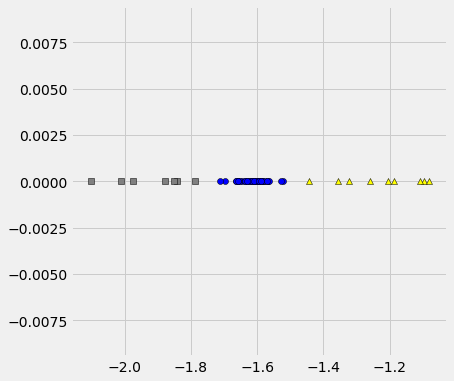

In [133]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111)

ax0.scatter(single_d[0:7],y[0:7],marker='s',c='grey',edgecolor='black')
ax0.scatter(single_d[7:18],y[7:18],marker='^',c='yellow',edgecolor='black')
ax0.scatter(single_d[18:62],y[18:62],marker='o',c='blue',edgecolor='black')
